In [1]:
!pwd

/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/CAKD07_PROJECT/Dacon_Can_de/WorkSpace/HAN


# MIL 을 의한 이미지 분할

## import

In [2]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
pd.set_option('display.max.colwidth', 150)
pd.set_option('display.max.row', 500)

import warnings
warnings.filterwarnings('ignore')

## train_imgs  확인

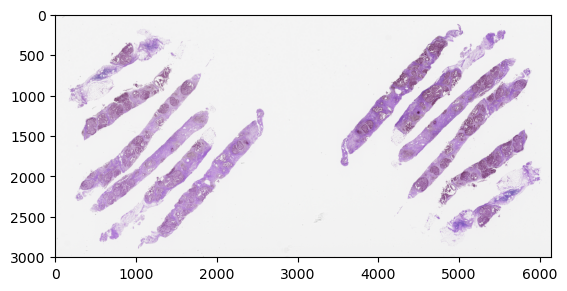

In [3]:
trian_mask_test_img = '../../open/train_imgs/BC_01_0001.png'
img = cv2.imread(trian_mask_test_img, cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap='gray')
plt.show()

## Image Crop

### 이미지 자르는 사용자 함수

In [4]:
def Img_Crop(input_dir, input_img_name_list, crop_size, flag):
    print('img_crop 중...')
#     output_dir = input_dir+'_cropped'
    output_dir = '/Users/mac/Downloads/train_imgs_cropped'
    if ~os.path.exists(output_dir):
        os.makedirs(output_dir)

    for img_name in tqdm(input_img_name_list):
        img = os.path.join(input_dir, img_name)
        cv2_img = cv2.imread(img, flag)
        for row, start_y_pixel in enumerate(range(0, cv2_img.shape[0], crop_size)):
            for col, start_x_pixel in enumerate(range(0, cv2_img.shape[1], crop_size)):
                croped_img = cv2_img[start_y_pixel:start_y_pixel +
                                     crop_size, start_x_pixel:start_x_pixel+crop_size]
                cv2.imwrite(
                    f'{output_dir}/{img_name.split(".")[0]}_({row+1:03d},{col+1:03d}).png', croped_img)
    print('완료')

### 이미지 자르기

In [5]:
# 크롭하려는 img 폴더
input_dir = '../../open/train_imgs'

# 크롭하려는 img name list
input_img_name_list = sorted(os.listdir(input_dir))
# print(len(input_img_list))
# print(input_img_list)

# 크롭할 사이즈
crop_size = 256

# 이미지 불러오는 형식
flag = cv2.IMREAD_UNCHANGED

# image cropping
# Img_Crop(input_dir, input_img_name_list, crop_size, flag)

## Vacant Pixel Ratio

### 비어있는 픽셀 계산 사용자 함수

In [6]:
def Color_Pixel_Ratio(input_dir, input_img_name_list, flag):
    print('Color_Pixel_Ratio 측정 중...')

    df = pd.DataFrame(columns=['img_name', 'Vacant_Pixel', 'Color_Pixel', 'Color_Pixel_Ratio'])
    df['img_name'] = pd.Series(input_img_name_list)
    print(f'작업을 수행할 image 수 : {len(input_img_name_list)}')
    df = df.fillna(0)

    for index, img_name in tqdm(enumerate(input_img_name_list)):
        img = os.path.join(input_dir, img_name)
        cv2_img = cv2.imread(img, flag)
        for i in range(cv2_img.shape[0]):
            for j in range(cv2_img.shape[1]):
                if cv2_img[i, j] not in list(range(240,256)):
                    df.loc[index, 'Color_Pixel'] += 1
                else:
                    df.loc[index, 'Vacant_Pixel'] += 1
        df.loc[index, 'Color_Pixel_Ratio'] = df.loc[index, 'Color_Pixel'] / (df.loc[index, 'Vacant_Pixel'] + df.loc[index, 'Color_Pixel'])
    display(df)

    print('완료')
    return df

### 비어있는 픽셀 계산

In [7]:
# input img 폴더
# input_dir = '../../open/train_imgs_cropped'
input_dir = '/Users/mac/Downloads/train_imgs_cropped'

# img name list
input_img_name_list = sorted(os.listdir(input_dir))
# print(input_img_name_list[:10])
print(input_img_name_list)

# 이미지 불러오는 형식
flag = cv2.IMREAD_GRAYSCALE

# image cropping
# df = Color_Pixel_Ratio(input_dir, input_img_name_list, flag)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 지웅

In [ ]:
# df = Color_Pixel_Ratio(input_dir, input_img_name_list[0:10000], flag)
# df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_0.pkl')
# df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_0.pkl')
# display(df)
df = Color_Pixel_Ratio(input_dir, input_img_name_list[10000:20000], flag)
df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_10000.pkl')
df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_10000.pkl')
display(df)
# df = Color_Pixel_Ratio(input_dir, input_img_name_list[20000:30000], flag)
# df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_20000.pkl')
# df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_20000.pkl')
# display(df)
# df = Color_Pixel_Ratio(input_dir, input_img_name_list[30000:40000], flag)
# df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_30000.pkl')
# df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_30000.pkl')
# display(df)
# df = Color_Pixel_Ratio(input_dir, input_img_name_list[40000:50000], flag)
# df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_40000.pkl')
# df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_40000.pkl')
# display(df)
# df = Color_Pixel_Ratio(input_dir, input_img_name_list[50000:60000], flag)
# df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_50000.pkl')
# df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_50000.pkl')
# display(df)

Color_Pixel_Ratio 측정 중...
작업을 수행할 image 수 : 10000


16it [02:09,  8.92s/it]

In [ ]:
# import pandas as# 지웅

df = Color_Pixel_Ratio(input_dir, input_img_name_list[0:10000], flag)
df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_0.pkl')
df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_0.pkl')
display(df)
df = Color_Pixel_Ratio(input_dir, input_img_name_list[10000:20000], flag)
df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_10000.pkl')
df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_10000.pkl')
display(df)
df = Color_Pixel_Ratio(input_dir, input_img_name_list[20000:30000], flag)
df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_20000.pkl')
df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_20000.pkl')
display(df)
df = Color_Pixel_Ratio(input_dir, input_img_name_list[30000:40000], flag)
df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_30000.pkl')
df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_30000.pkl')
display(df)
df = Color_Pixel_Ratio(input_dir, input_img_name_list[40000:50000], flag)
df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_40000.pkl')
df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_40000.pkl')
display(df)
df = Color_Pixel_Ratio(input_dir, input_img_name_list[50000:60000], flag)
df.to_pickle('./train_imgs_cropped_Color_Pixel_Ratio_50000.pkl')
df = pd.read_pickle('./train_imgs_cropped_Color_Pixel_Ratio_50000.pkl')
display(df)